In [33]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error


In [44]:
# Reading data from CSV

df = pd.read_csv('csv-files/GS.csv')
print(df.info())
print('Number of trading days: ',df.shape) # In this case, 3691

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3691 entries, 0 to 3690
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3691 non-null   object 
 1   Open       3691 non-null   float64
 2   High       3691 non-null   float64
 3   Low        3691 non-null   float64
 4   Close      3691 non-null   float64
 5   Adj Close  3691 non-null   float64
 6   Volume     3691 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 202.0+ KB
None
Number of trading days:  (3691, 7)


In [27]:
# Preprocessing of data

df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)
df.drop('Date', inplace=True, axis=1)
print(df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1999-05-05   69.875000   69.875000   66.250000   69.125000   51.574493   
1999-05-06   68.000000   69.375000   67.062500   67.937500   50.688461   
1999-05-07   67.937500   74.875000   66.750000   74.125000   55.304981   
1999-05-10   73.375000   73.500000   70.250000   70.687500   52.740257   
1999-05-11   70.000000   71.187500   69.500000   70.625000   52.693634   
...                ...         ...         ...         ...         ...   
2013-12-27  176.389999  176.449997  175.570007  176.350006  150.962402   
2013-12-30  176.500000  177.119995  175.259995  175.729996  150.431625   
2013-12-31  176.220001  177.440002  176.220001  177.259995  151.741409   
2014-01-02  176.949997  178.380005  176.360001  176.889999  151.424698   
2014-01-03  176.350006  178.850006  176.220001  178.149994  152.503250   

             Volume  
Date           

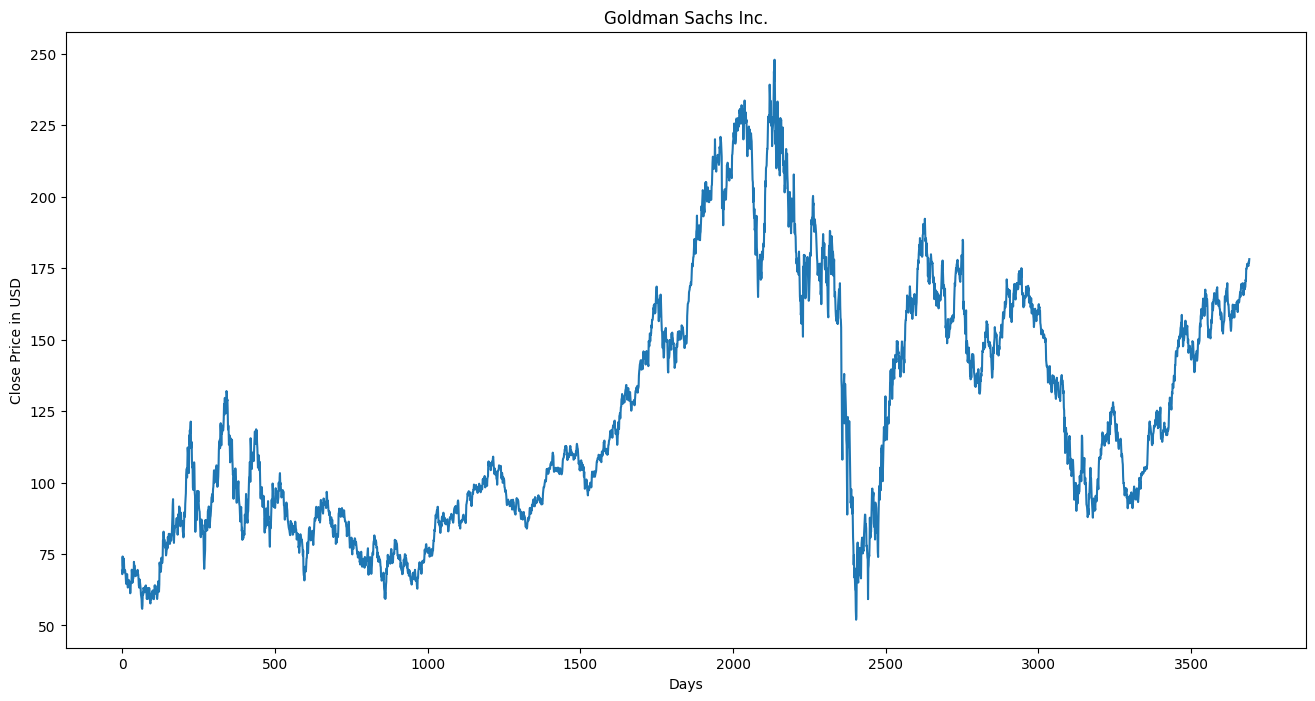

In [45]:
# Visualise the close price
plt.figure(figsize= (16,8))
plt.title('Goldman Sachs Inc.')
plt.xlabel('Days')
plt.ylabel('Close Price in USD')
plt.plot(df['Close'])
plt.show()

In [53]:
# Process of creating a training dataset:

# We need to decide what features to keep - 
# NOTE: these are my own tests
# Features to keep: Close

df = df[['Close']]
df.head(5)

# Predict X days into the future
future = 21 # a trading month

# We create a prediction column
df['Predictions'] = df[['Close']].shift(-future)

,Close,Predictions
0,69.1250,65.3750
1,67.9375,65.9375
2,74.1250,63.7500
3,70.6875,65.5000
4,70.6250,63.3750


In [55]:
# Creating the feature training set
X = np.array(df.drop(['Predictions'], 1))[:-future]

/var/folders/dy/hyg4l0p11hx9m1ltbrlz7dg80000gn/T/ipykernel_4316/1279230110.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Predictions'], 1))[:-future]


In [57]:
# Create the target dataset
y = np.array(df['Predictions'])[:-future]

[ 65.375     65.9375    63.75     ... 177.259995 176.889999 178.149994]


In [58]:
# Splitting the data into training and testing - using the features decided
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
print('Train - features: ', x_train.shape,'Labels: ', y_train.shape)
print('Test - features: ', x_test.shape,'Labels: ', y_test.shape)

Train - features:  (2569, 1) Labels:  (2569,)
Test - features:  (1101, 1) Labels:  (1101,)


In [59]:
# Define the model 
# NOTE ! To add later, the ANN and Ridge!

model = Lasso(alpha=1.0)

# Train the model
LR = model.fit(x_train, y_train)


In [62]:
# get the last x rows from the feature dataset
x_future = df.drop(['Predictions'],1)[:-future]
x_future = x_future.tail(future)
x_future = np.array(x_future)

/var/folders/dy/hyg4l0p11hx9m1ltbrlz7dg80000gn/T/ipykernel_4316/2640738258.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = df.drop(['Predictions'],1)[:-future]


array([[163.160004],
       [161.949997],
       [163.520004],
       [159.639999],
       [163.169998],
       [163.839996],
       [162.889999],
       [162.940002],
       [163.199997],
       [164.399994],
       [165.679993],
       [166.600006],
       [165.      ],
       [167.070007],
       [168.100006],
       [169.479996],
       [168.039993],
       [168.220001],
       [168.940002],
       [169.720001],
       [168.050003]])

In [ ]:
# Use model to make predictions
Lasso_pred = LR.predict(x_future)

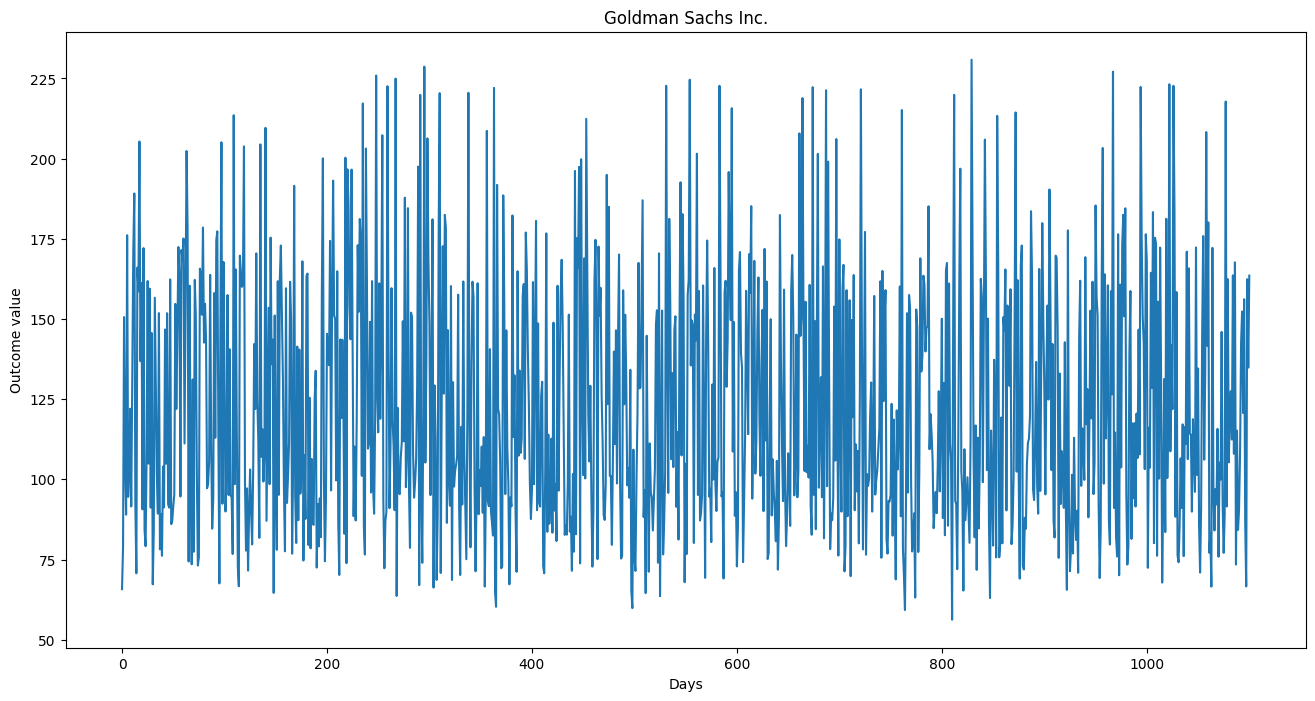

In [60]:
# Visualise the prediction
plt.figure(figsize= (16,8))
plt.title('Goldman Sachs Inc.')
plt.xlabel('Days')
plt.ylabel('Outcome value')
plt.plot(y_pred)
plt.show()

In [24]:
# Evaluating the model using K-fold CV
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [43]:
# Plotting the result

plt.plot(df.index.to_pydatetime(),y_pred)

(1108,)